In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def plot_metrics(history):
  metrics = ['precision', 'recall', 'auc', 'prc']
  # metrics_val = ['precison_validation', 'recall_validation', 'auc_validation', 'prc_validation']
  
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history['Epoch'], history[metric + '_train'], color=colors[0], label='Train')
    plt.plot(history['Epoch'], history[metric + '_validation'],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [4]:
result = pd.read_csv('train_val_precisons.csv')

In [5]:
result

,Fold,Epoch,precison_Train,precison_Validation,precision_train,precision_validation,recall_train,recall_validation,auc_train,auc_validation,prc_train,prc_validation
0,1.0,1.0,NaN,NaN,0.951979,0.952889,0.951979,0.952889,0.972009,0.970798,0.965763,0.962943
1,1.0,2.0,NaN,NaN,0.961761,0.953778,0.961761,0.953778,0.975865,0.969575,0.969395,0.960913
2,1.0,3.0,NaN,NaN,0.965763,0.874667,0.965763,0.874667,0.981191,0.953465,0.976154,0.944620
3,1.0,4.0,NaN,NaN,0.966874,0.968889,0.966874,0.968889,0.984057,0.979945,0.979971,0.974177
4,1.0,5.0,NaN,NaN,0.967986,0.929778,0.967986,0.929778,0.985201,0.976542,0.981237,0.975569
...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.0,96.0,NaN,NaN,0.992665,0.970641,0.992665,0.970641,0.998439,0.979528,0.998013,0.973593
496,5.0,97.0,NaN,NaN,0.993554,0.974199,0.993554,0.974199,0.998538,0.986313,0.998117,0.982358
497,5.0,98.0,NaN,NaN,0.994221,0.964413,0.994221,0.964413,0.999216,0.977033,0.999004,0.970370
498,5.0,99.0,NaN,NaN,0.994666,0.974199,0.994666,0.974199,0.998136,0.981320,0.997579,0.975862


KeyError: 'precison_train'

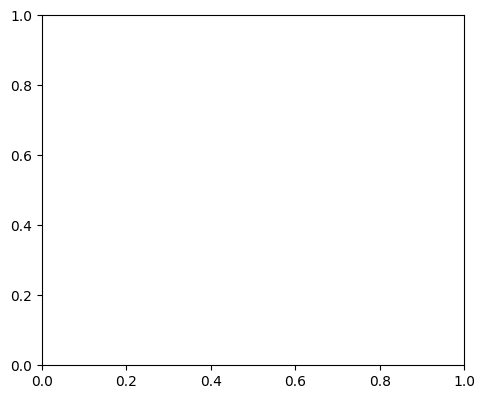

In [6]:
df_fold = result.where(result['Fold'] == 4)
plot_metrics(df_fold)